### Modelo logístico

Dados categóricos 0 e 1 

#### 1. O termo cifose refere-se a uma grave curvatura protuberante da coluna vertebral que necessita de cirurgia corretiva. Um estudo realizado para determinar os fatores de risco da cifose relatou as idades a seguir (meses) para 40 indivíduos no momento da cirurgia; os primeiros 18 indivíduos tiveram cifose e os 22 restantes, não.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot

In [2]:
x = (12,15,42,52,59,73,82,91,96,105,114,120,121,128,130,139,139,157,1,1,2,8,11,18,22,31,37,61,72,81,97,112,118,127,131,140,151,159,177,206)
y= (1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
# Construir o DataFrame e nomear as colunas
df = pd.DataFrame(list(zip(x, y)),
               columns =["x","y"])
x=df['x']
y=df['y']
df.head()

,x,y
0,12,1
1,15,1
2,42,1
3,52,1
4,59,1


In [3]:
#adicionar uma constante preditora
x = sm.add_constant(x)

#Logit Regression Results
model = sm.Logit(y, x).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.681303
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   40
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 May 2022   Pseudo R-squ.:                0.009934
Time:                        15:50:34   Log-Likelihood:                -27.252
converged:                       True   LL-Null:                       -27.526
Covariance Type:            nonrobust   LLR p-value:                    0.4596
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5727      0.602     -0.951      0.342      -1.753       0.608
x              0.0043      0.

In [4]:
#b0 e b1
b=model.params
print(model.params)

#equação e**b0 + b1x

const   -0.572693
x        0.004296
dtype: float64


Text(0, 0.5, 'p(x) Com ou sem Cifose')

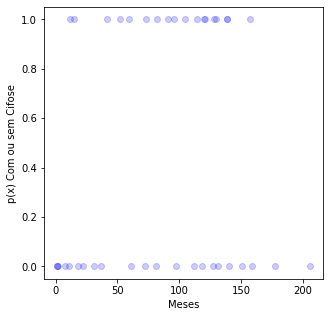

In [5]:
x=df['x']
plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.scatter(x, y, color='b', alpha=0.20)
ax.set_xlabel('Meses')
ax.set_ylabel('p(x) Com ou sem Cifose')


In [6]:
#teste de hipotese

#usar a tabela tstudent
from scipy.stats import t
alpha = 0.05  # nível de signif.= 5% 
df = len(x) - 2 # graus de liberdade (Número de amostras menos dois)                                     
#
v = t.ppf(1 - alpha/2, df) 
tcrit=v
print(f'tcrit=: {v}') 

#z: estatística de teste (t_calc)
zt = model.tvalues
ztb1 = zt[1]
print(f'tcalc=: {ztb1}') 


#usar a tabela tstudent
from scipy.stats import t
#calculate p-value  TWO TAILED
p_val= (1-t.cdf(x=abs(ztb1), df=len(x))) * 2
print(f'p_val=: {p_val}')

#tcalc < tcrit e p_val < alpha, não rejeitar hipótese (b10 = 0)

tcrit=: 2.024394164575136
tcalc=: 0.7344029072729139
p_val=: 0.46698681622739535


#### 2. Interprete o resultado da regressão logística e esboce um gráfico da probabilidade de um nível de ruído aceitável como uma função do nível de ruído específico.

In [7]:
#teste de ruídos aceitáveis e não aceitáveis
x = (55.3,55.3,55.3,55.9,55.9,55.9,55.9,56.1,56.1,56.1,56.1,56.1,56.1,56.8,56.8,57.0,57.0,57.0,57.8,57.8,57.8,57.9,57.9,57.9,58.8,58.8,58.8,59.8,
        59.8,59.8,62.2,62.2,65.3,65.3,65.3,65.3,68.7,69.0,73.0,73.0,63.8,63.8,
        63.8,63.9,63.9,63.9,64.7,64.7,64.7,65.1,65.1,65.1,67.4,67.4,67.4,67.4,
        68.7,68.7,68.7,70.4,70.4,71.2,71.2,73.1,73.1,74.6,74.6,74.6,74.6,79.3,
        79.3,79.3,79.3,79.3,83.0,83.0,83.0)
y = (1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
        1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
        0,0,0,0,0,0,0)
# Construir o DataFrame e nomear as colunas
df1 = pd.DataFrame(list(zip(x, y)),
               columns =["x","y"])
x=df1['x']
y=df1['y']
df1.head()

,x,y
0,55.3,1
1,55.3,1
2,55.3,1
3,55.9,1
4,55.9,1


In [8]:
#adicionar uma constante preditora
x = sm.add_constant(x)
# Construir o modelo e ajustar os dados
modelo = sm.Logit(y, x).fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.353003
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   77
Model:                          Logit   Df Residuals:                       75
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 May 2022   Pseudo R-squ.:                  0.4902
Time:                        15:50:35   Log-Likelihood:                -27.181
converged:                       True   LL-Null:                       -53.314
Covariance Type:            nonrobust   LLR p-value:                 4.849e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0140      5.041      4.565      0.000      13.133      32.895
x             -0.3562      0.

NameError: name 'yhat' is not defined

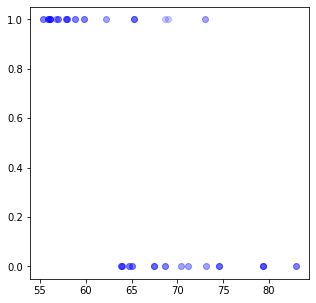

In [9]:
x=df1['x']
y=df1['y']
plt.figure(figsize=(5, 5))
ax = plt.axes()
ax.scatter(x, y, color='b', alpha=0.20)
ax.scatter(x, yhat, color="black", s=4)
ax.set_xlabel('Noise')
ax.set_ylabel('p(x) Aceitável - Não aceitável')

In [ ]:
#z: estatística de teste 
zt2=modelo.tvalues
ztb1=zt2[1]
ztb1

In [ ]:
#usar a tabela tstudent
from scipy.stats import t
#calculate p-value  TWO TAILED
p_val= (1-t.cdf(x=abs(ztb1), df=len(x))) * 2
p_val

In [ ]:
#Obter a razão das chances
odd=np.exp(modelo.params)
odd[1]

#para cada incremento de ruído, estima-se que as chances de ter um ruído não acewitável diminuem 0.7 (30%)

In [ ]:
params = modelo.params
conf = modelo.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))


In [ ]:
# performing predictions on the test datdaset
yhat = modelo.predict()
prediction = list(map(round, yhat))
 
# comparing original and predicted values of y
print('Valores observados:', list(y))
print('Valores previstos:', prediction)
df2 = pd.DataFrame(list(zip(y, prediction)),
               columns =["x","y"])
#df2.to_csv(index=False)


In [ ]:
from sklearn.metrics import (confusion_matrix,accuracy_score)
 
# confusion matrix
cm = confusion_matrix(y, prediction)
print ("Confusion Matrix : \n", cm)
 
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y, prediction))

### Modelo polinomial

#### Imports

In [46]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns

from statsmodels.formula.api                import ols
from statsmodels.graphics.gofplots          import ProbPlot
from sklearn.preprocessing                  import PolynomialFeatures
from scipy.stats                            import t
from scipy                                  import stats
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#### 1. considere uma regressão quadrática de y = densidade aparente sobre x = teor de umidade.

In [47]:
x = (7,10.3,13.7,16.6,19.8,22)
y = (479,503,487,470,458,412)


df = pd.DataFrame(list(zip(x, y)),
               columns =["x","y"])
x = df['x']
y = df['y']

In [48]:
#Proceso de regressão 
x = sm.add_constant(x)
#fit linear regression model
modelo = sm.OLS(y, x).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     6.950
Date:                Wed, 04 May 2022   Prob (F-statistic):             0.0578
Time:                        13:29:47   Log-Likelihood:                -25.637
No. Observations:                   6   AIC:                             55.27
Df Residuals:                       4   BIC:                             54.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        533.6984     26.328     20.271      0.0

/home/felipe_oliveira/anaconda3/envs/env_01/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


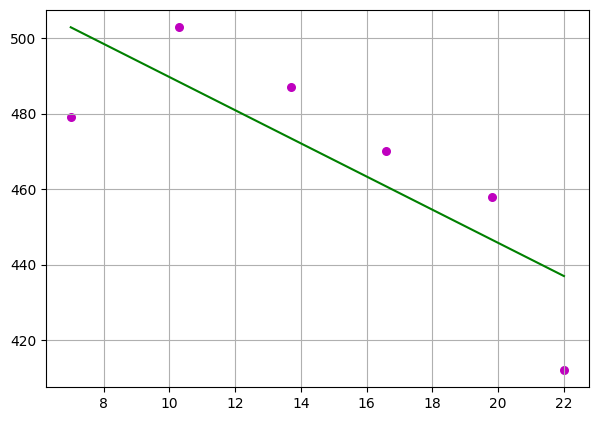

In [49]:
x=df['x']
y=df['y']

yp = 533.6984 -4.3981*x

plt.plot(x, yp, color = "g")
plt.scatter(x, y, color = "m",  marker = "o", s = 30)
plt.grid(True)
x = sm.add_constant(x)

#### a. Um gráfico de dispersão dos dados parece consistente com o modelo de regressão quadrática?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


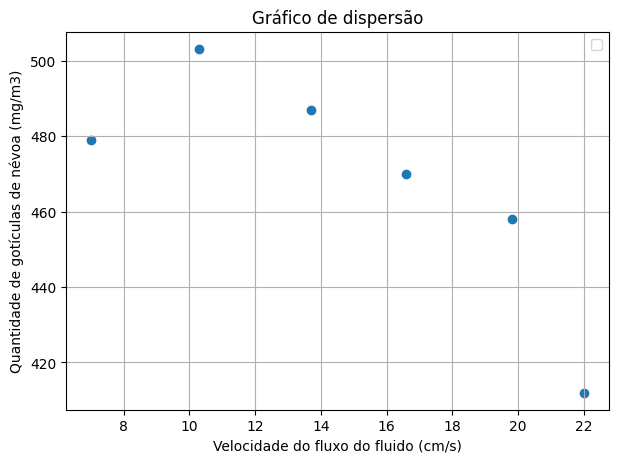

In [50]:
#analisar o gráfico
x=df['x']
y=df['y']
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.scatter(x,y)
plt.xlabel('Velocidade do fluxo do fluido (cm/s)')
plt.ylabel('Quantidade de gotículas de névoa (mg/m3)') 
plt.title('Gráfico de dispersão')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
#dado que os dados apresentam um polinômio quadrático, adequar os dados com sklearn
x=df['x']
y=df['y']
x = sm.add_constant(x) 

#definir o valor de k, isto é o grau do polinômio
polynomial_features= PolynomialFeatures(degree=2)
xp = polynomial_features.fit_transform(x)
xp.shape

(6, 6)

In [52]:
xp

array([[  1.  ,   1.  ,   7.  ,   1.  ,   7.  ,  49.  ],
       [  1.  ,   1.  ,  10.3 ,   1.  ,  10.3 , 106.09],
       [  1.  ,   1.  ,  13.7 ,   1.  ,  13.7 , 187.69],
       [  1.  ,   1.  ,  16.6 ,   1.  ,  16.6 , 275.56],
       [  1.  ,   1.  ,  19.8 ,   1.  ,  19.8 , 392.04],
       [  1.  ,   1.  ,  22.  ,   1.  ,  22.  , 484.  ]])

In [53]:
xp[:,3:6]

array([[  1.  ,   7.  ,  49.  ],
       [  1.  ,  10.3 , 106.09],
       [  1.  ,  13.7 , 187.69],
       [  1.  ,  16.6 , 275.56],
       [  1.  ,  19.8 , 392.04],
       [  1.  ,  22.  , 484.  ]])

In [54]:
#Aplicar a regressão polinomial com o novo x, isto é xp
modelpo = sm.OLS(y,xp[:,3:6]).fit()
ypred = modelpo.predict(xp[:,3:6]) 
ypred.shape

(6,)

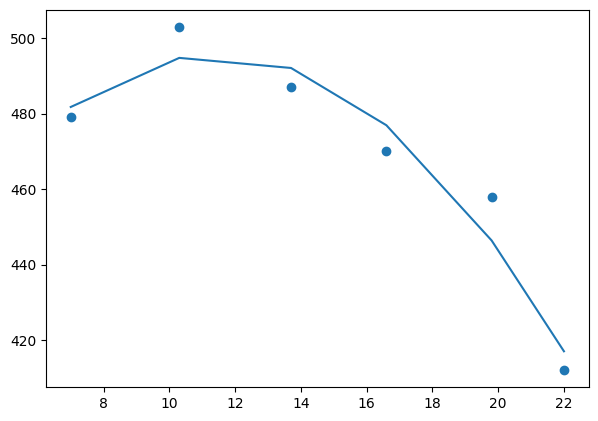

In [55]:
x=df['x']
plt.scatter(x,y)
plt.plot(x,ypred)

In [56]:
modelpo = sm.OLS(y, xp[:,3:6]).fit()
print(modelpo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     22.51
Date:                Wed, 04 May 2022   Prob (F-statistic):             0.0156
Time:                        13:30:02   Log-Likelihood:                -20.339
No. Observations:                   6   AIC:                             46.68
Df Residuals:                       3   BIC:                             46.05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        403.2396     36.453     11.062      0.0

/home/felipe_oliveira/anaconda3/envs/env_01/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


#### b. Que porporção da variação observada na densidade pode ser atribuída à relação do modelo?

In [57]:
#proporção = coeficiente de determinação
#calcular SQE--> Baseado nos valores esperados
sqe = np.sum((ypred - y)**2)
print("SQE=", sqe)

#calcular SQT-->Baseado nos valores observados
sqt = np.sum((y - y.mean())**2)
print("SQT=", sqt)

#calcular SQR
sqr = sqt - sqe
print("SQR=",sqr)

r2=1-sqe/sqt
print("Coeficiente de determinação múltippla=",r2, "ou",r2*100, "%")

k=modelpo.df_model # grau do modelo
n=modelpo.nobs # num. amostras
r2adj=((n-1)*r2-k)/(n-1-k)

print("R2 ajustado=",r2adj, "ou",r2adj*100, "%")

SQE= 309.1089896030001
SQT= 4946.833333333333
SQR= 4637.724343730333
Coeficiente de determinação múltippla= 0.9375137651151241 ou 93.7513765115124 %
R2 ajustado= 0.8958562751918734 ou 89.58562751918734 %


In [58]:
r2d=modelpo.rsquared
r2adjd=modelpo.rsquared_adj
print('R2= {0}, R2 ajustado= {1}'.format(r2d,r2adjd))  

R2= 0.9375137651151241, R2 ajustado= 0.8958562751918735


In [59]:
df1 = pd.DataFrame(list(zip(xp[:,3],xp[:,4],xp[:,5],y)),
               columns =["x1","x2","x3","y"])
df1.head(10)

,x1,x2,x3,y
0,1.0,7.0,49.00,479
1,1.0,10.3,106.09,503
2,1.0,13.7,187.69,487
3,1.0,16.6,275.56,470
4,1.0,19.8,392.04,458
5,1.0,22.0,484.00,412


In [60]:
pred=modelpo.get_prediction(df1.iloc[:,0:3])
pred.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,481.776822,9.354919,452.005294,511.548349,437.846284,525.707359
1,494.794694,5.780930,476.397196,513.192192,457.619215,531.970173
2,492.117734,6.486305,471.475416,512.760053,453.781673,530.453796
3,476.930505,6.095090,457.533208,496.327802,439.250226,514.610784
4,446.385379,5.693617,428.265749,464.505010,409.346625,483.424133
5,416.994866,8.748473,389.153321,444.836411,374.348648,459.641084


#### c. Calcule um IC de 95% para a densidade média verdadeira quando o teor de umidade for 13.7 e sy_inf = 6.49


In [61]:
x=df['x']
xs=13.7
xm=x.mean()
uy13=492.1155
xs,xm,uy13

(13.7, 14.9, 492.1155)

In [17]:
#usar a tabela tstudent pata t
alpha = 0.05  # significia = 5% 
df = n-(k+1) # graus de liberdade                                      
v = t.ppf(1 - alpha/2, df) 
tt=v
print(f't_crit=: {v}')

t_crit=: 3.182446305284263


#### d. Calcule o IP de 99% para a densidade média verdadeira quando o teor de umidade for 14

In [62]:
#usar a tabela tstudent pata t
alpha = 0.01  # significia = 1% 
df = n-(k+1) # graus de liberdade                                      
v = t.ppf(1 - alpha/2, df) 
tt=v
print(f't_crit=: {v}')

t_crit=: 5.84090929975643


In [63]:
s2=sqe/(n-(k+1))
s=pow(s2,1/2)
s

10.150681251407056

In [64]:
#obter a equação do statsmodel
#y = 403 + 16x - 0.7(x**2)

#uy,14 = 491

#tanto para IC quanto para IP a formula de intervalo tem alteração no gl ond se torna n-(k+1)

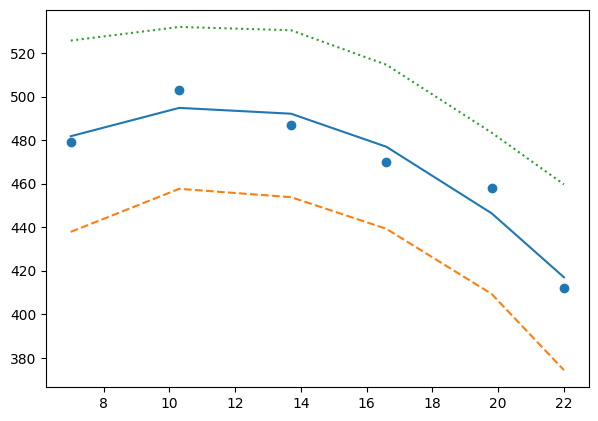

In [65]:
#Intervalos 
_, upper,lower = wls_prediction_std(modelpo)
plt.scatter(x,y)
plt.plot(x,ypred)
plt.plot(x,upper,'--',label="Maior") # confid. intrvl
plt.plot(x,lower,':',label="Menor")

#### e. O preditor quadrático parece fornecer informações úteis? Teste as hipóteses apŕopriadas no nível de significância de 0.05

In [22]:
#t calc em x2 não é maior que t_crit, rejeitar h0

#### 2. Um conjunto de 24 dados, em que a variável resposta é a resistência de um material e a variável preditora ou preditor é temperatura, foi analisado e obteve-se como resultado dessa análise o modelo polinomial descrito a seguir. y = -132.18 + 12.7x - 0.377x² + 0.00359x³. Se o erro-padrão é sy_inf = 0.0611, qual é o intervalo de confiança do valor esperado para x=30, a 95% ? Considere o valor t-student com  quatro casas decimais.

In [40]:
#informações
#x = temp
#y = resistencia
x = 30
n = 24
k = 3
y = -132.18 + 12.7*x - 0.377*(x**2) + 0.00359*(x**3)
sy_inf = 0.0611
alpha = 0.5

In [41]:
#calcular valor esperado na equação
x = 30
y = -132.18 + 12.7*x - 0.377*(x**2) + 0.00359*(x**3)
y

6.449999999999974

In [42]:
#calcular t_crit
#usar a tabela tstudent pata t
alpha = 0.05  # significia = 5% 
df = n-(k+1) # graus de liberdade                                      
t_crit = t.ppf(1 - alpha/2, df) 
print(f't_crit=: {t_crit}')

t_crit=: 2.0859634472658364


In [45]:
#calcular intervalo
ic = sy_inf * t_crit

print('Intervalo de confiança: {} < uy,30 < {}'.format(y - ic, y + ic))

Intervalo de confiança: 6.322547633372031 < uy,30 < 6.577452366627917
